#### 연습 문제 14.2.1

K-평균 군집화는 유클리드 거리를 사용하므로 너무 차원이 높을 때는 군집화 성능이 떨이질 수 있다. 이때는 차원축소를 한 후 군집화를 하는 것이 도움이 될 수도 있다. 

MNIST Digit 데이터를 10차원으로 차원축소하여 K-평균 군집화하고 ARI, AMI, 실루엣계수를 각각 계산하여 차원축소를 하지 않았을 때와 비교하라.

In [59]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA


digits = load_digits()

pca = PCA(n_components=10)
X = pca.fit_transform(digits.data)
model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(X)
y_pred = model.labels_


from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)



array([[  0,   2,   0,   0,   0, 176,   0,   0,   0,   0],
       [  1,   0,   2,  24,   0,   0,  99,   0,  55,   1],
       [ 10,   0,   0, 151,   3,   1,   9,   2,   1,   0],
       [154,   0,   0,   1,   6,   0,   7,  13,   0,   2],
       [  0, 164,   0,   0,  11,   0,   2,   0,   4,   0],
       [  0,   2,   2,   0,   0,   0,   0,  49,   0, 129],
       [  0,   0, 176,   0,   0,   1,   4,   0,   0,   0],
       [  0,   2,   0,   0, 167,   0,   3,   0,   3,   4],
       [  4,   0,   2,   3,   4,   0,  92,  45,   9,  15],
       [  8,   0,   0,   0,   7,   0,   1, 137,  20,   7]], dtype=int64)

In [61]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

print("ARI:", adjusted_rand_score(digits.target, y_pred))
print("AMI:", adjusted_mutual_info_score(digits.target, y_pred))
print("Silhouette Score:", silhouette_score(X, y_pred))

ARI: 0.6487269256012769
AMI: 0.718640310610668
Silhouette Score: 0.2632524624330638


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


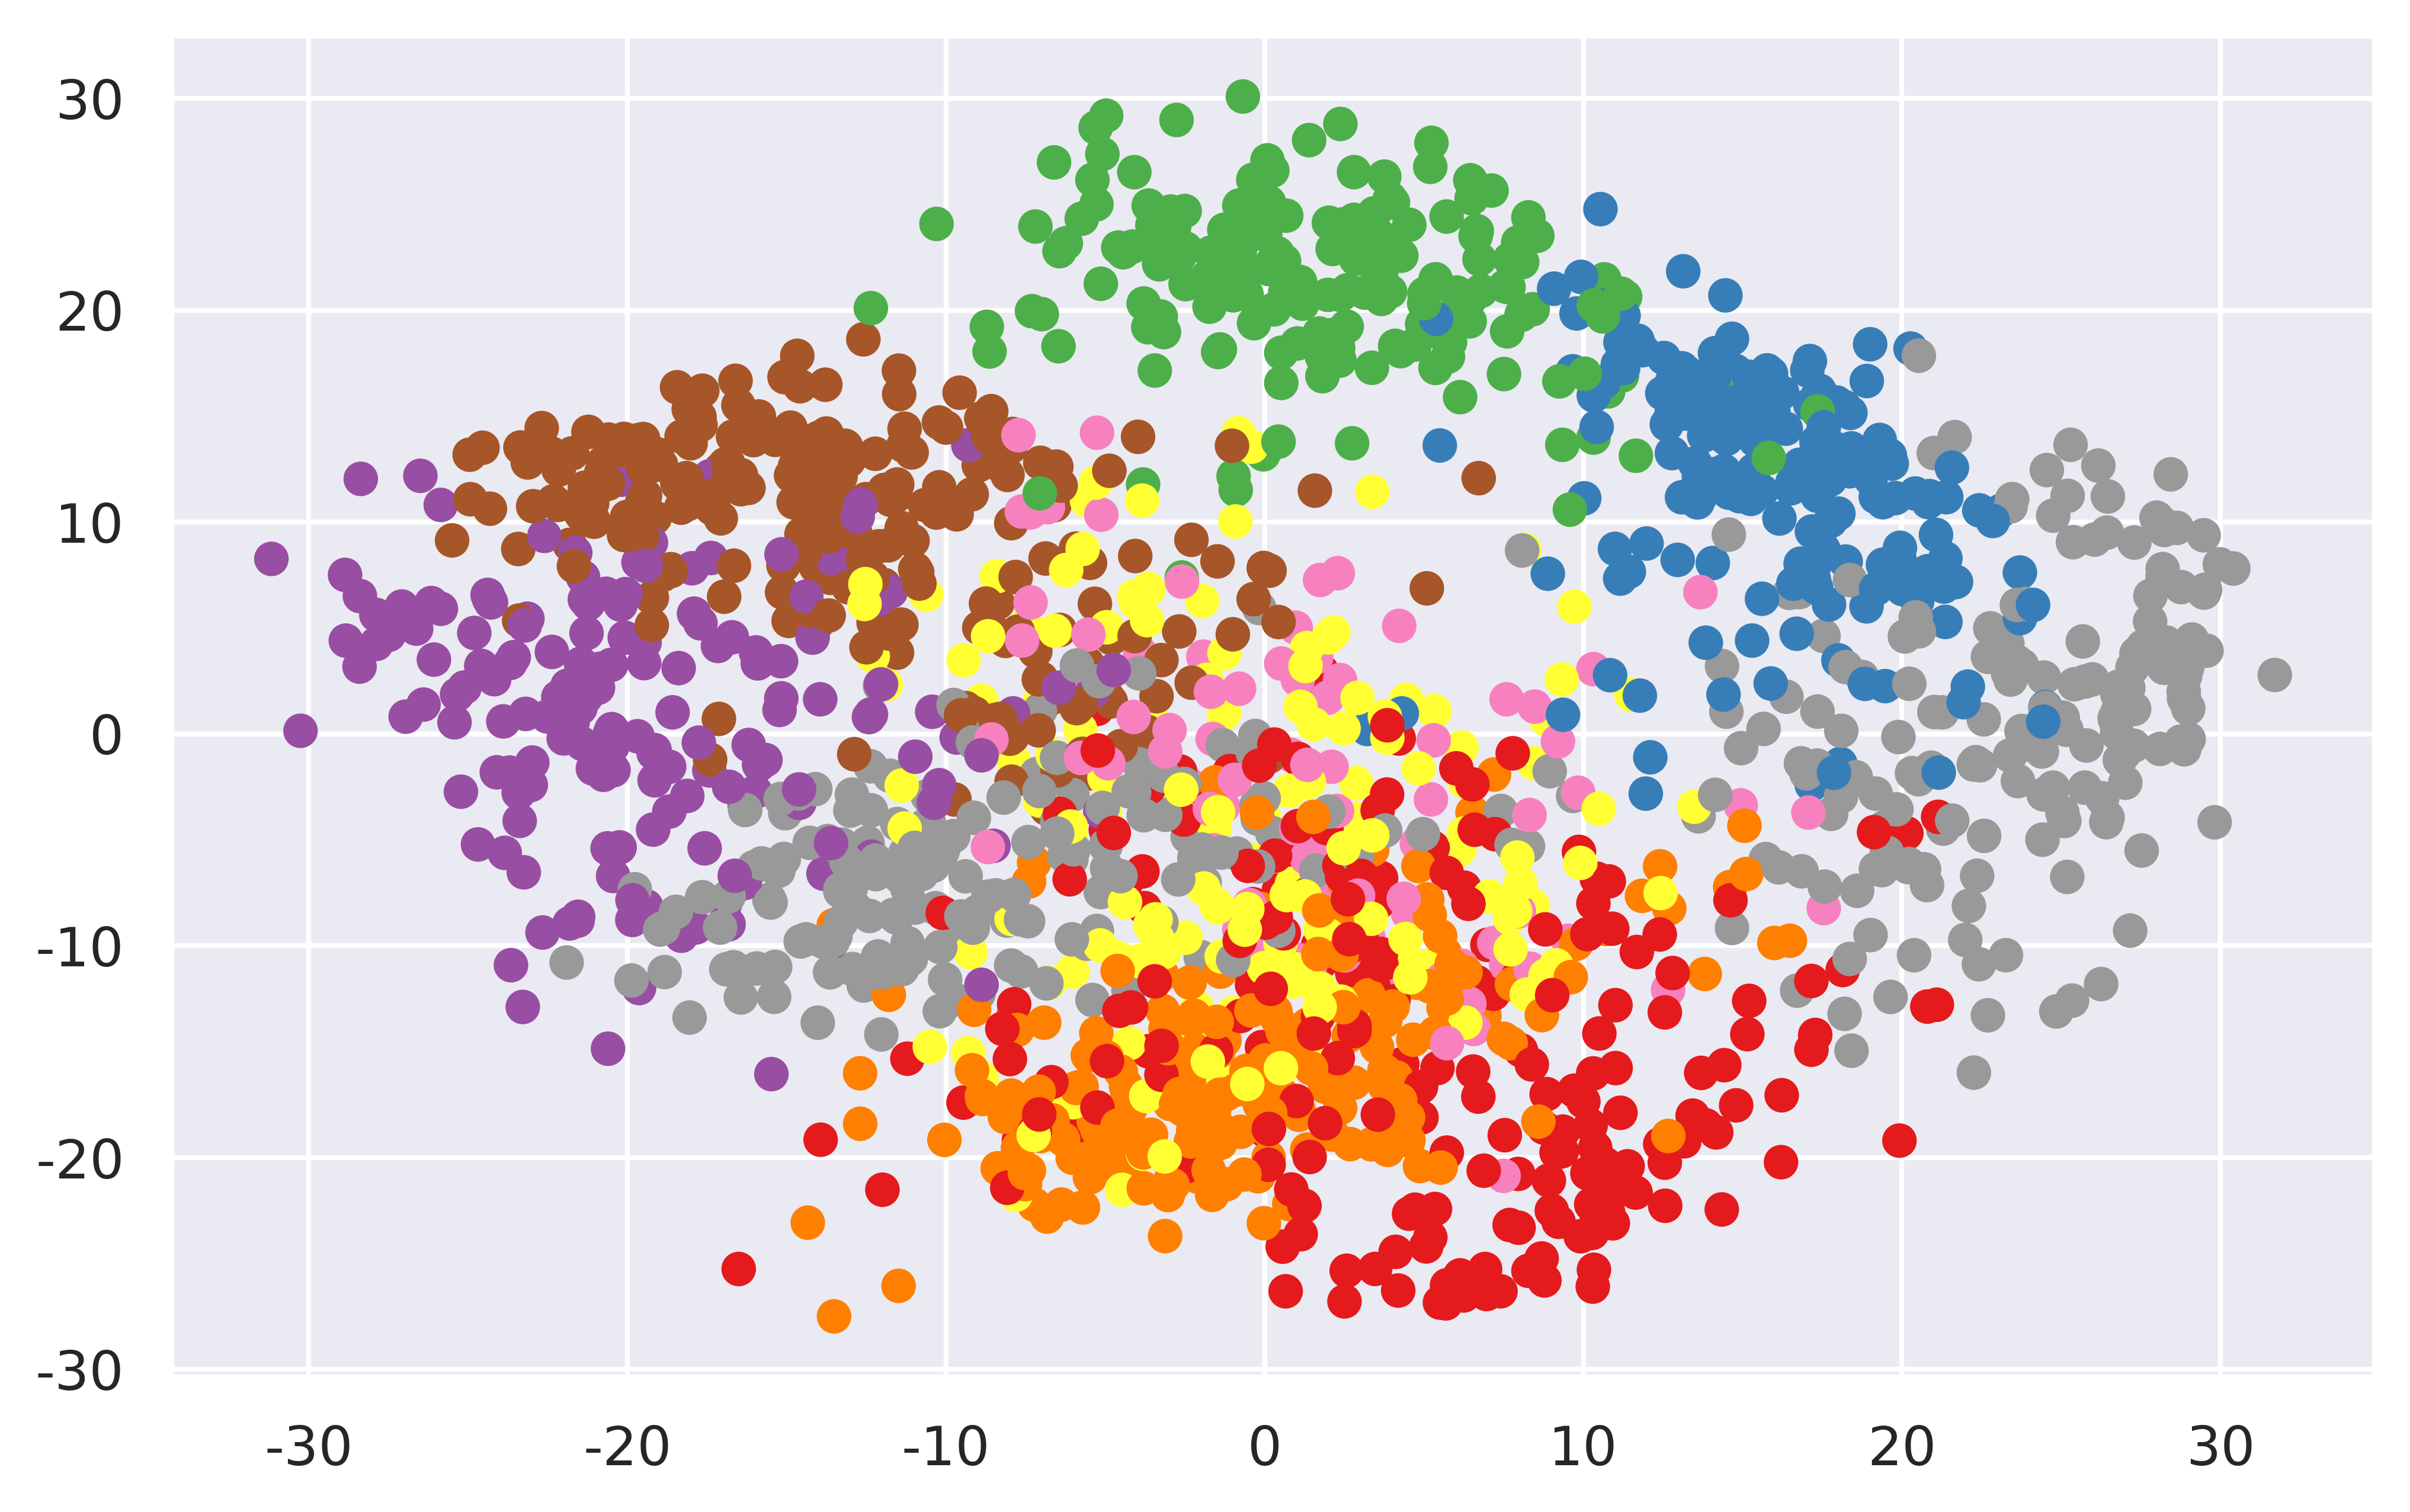

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()

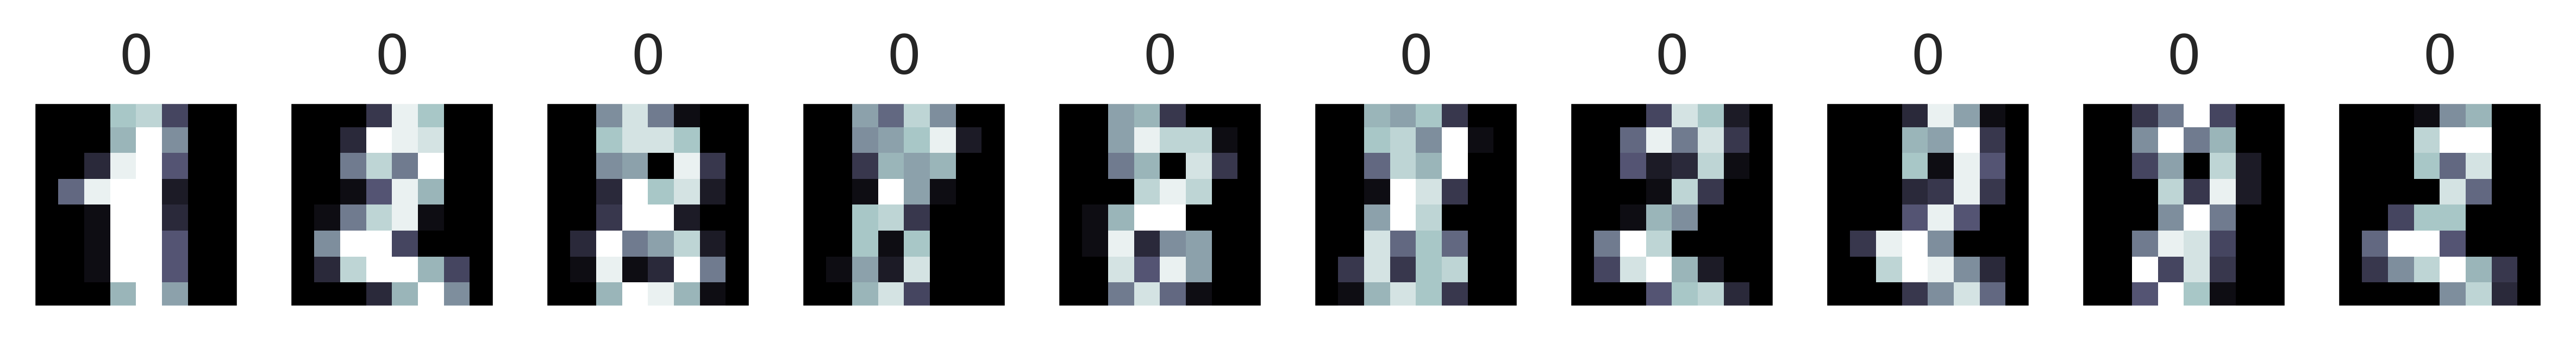

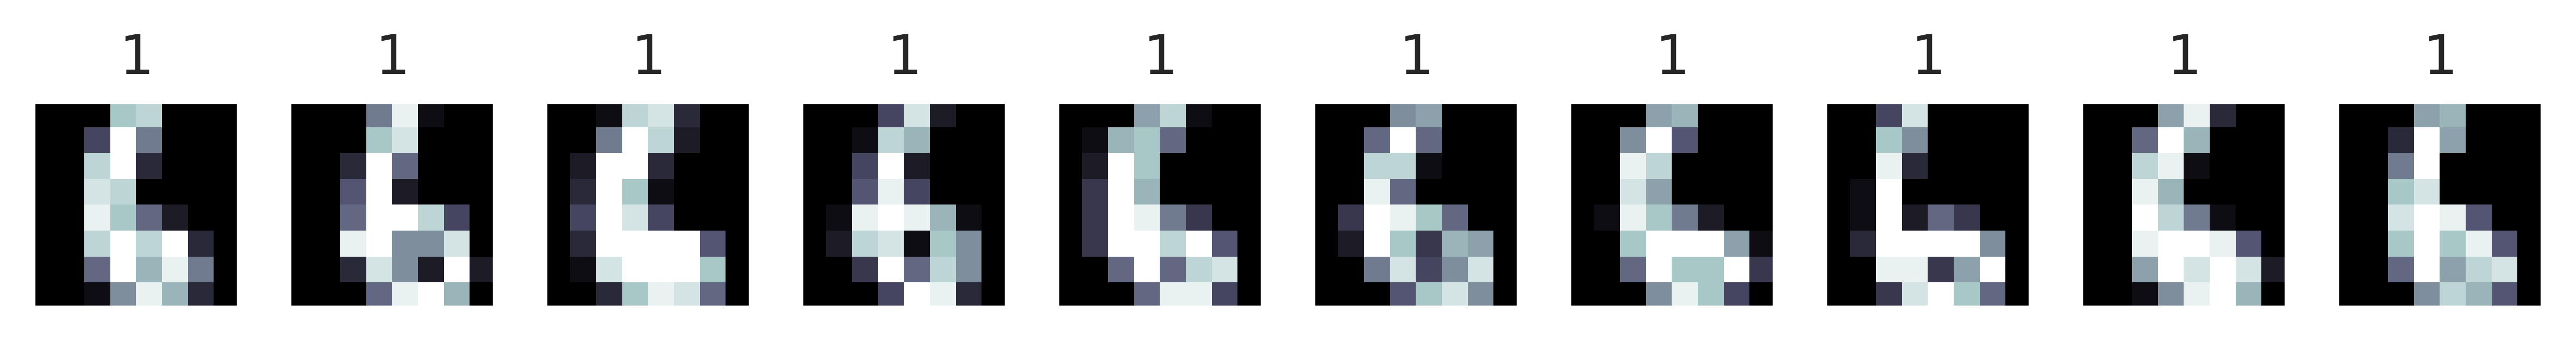

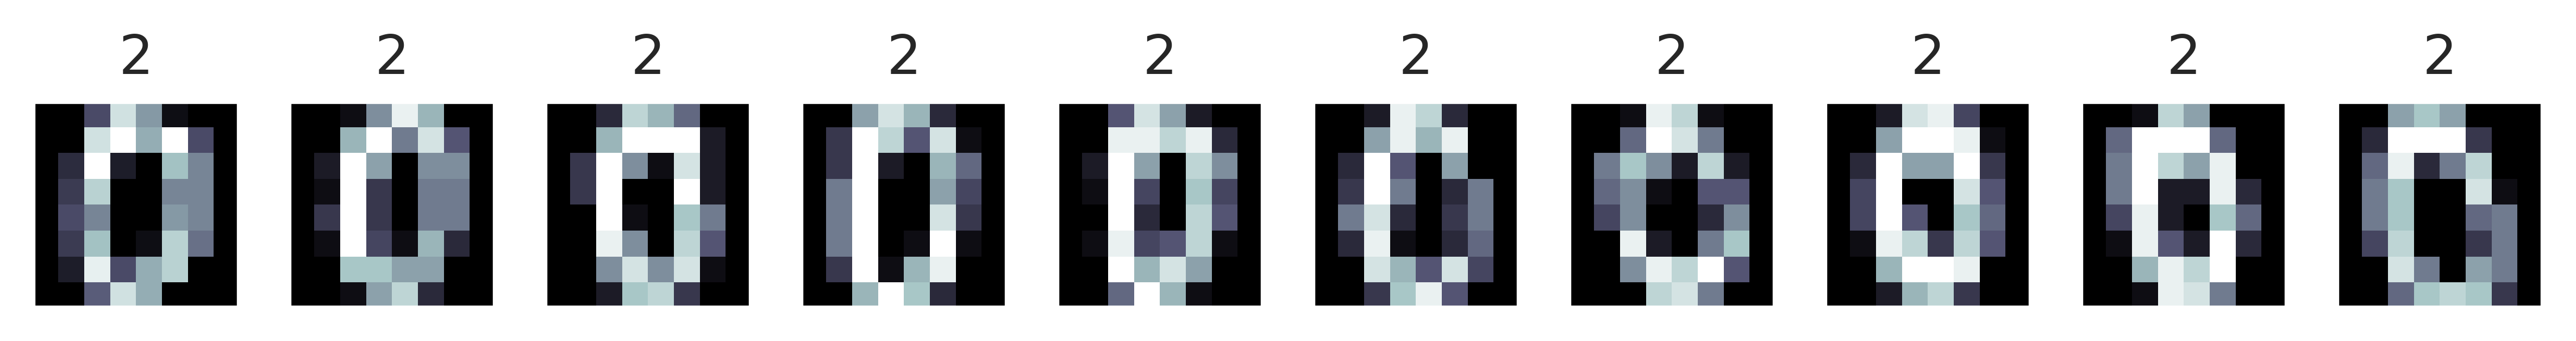

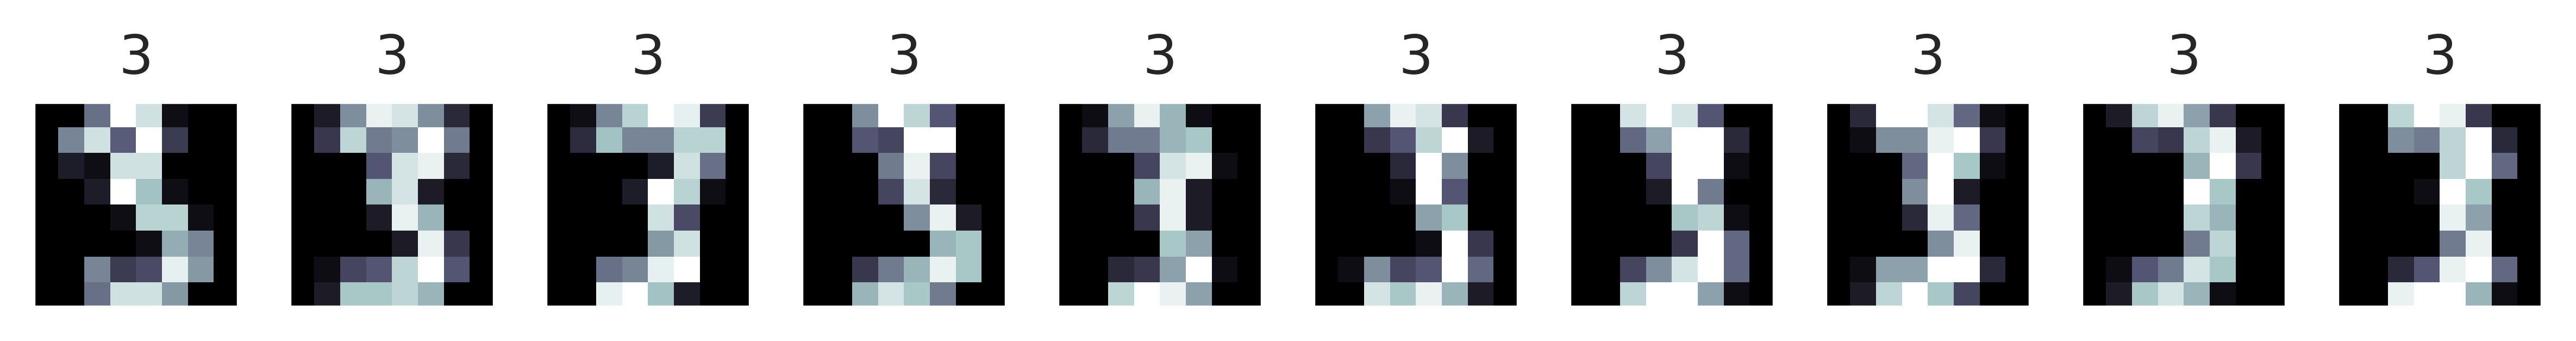

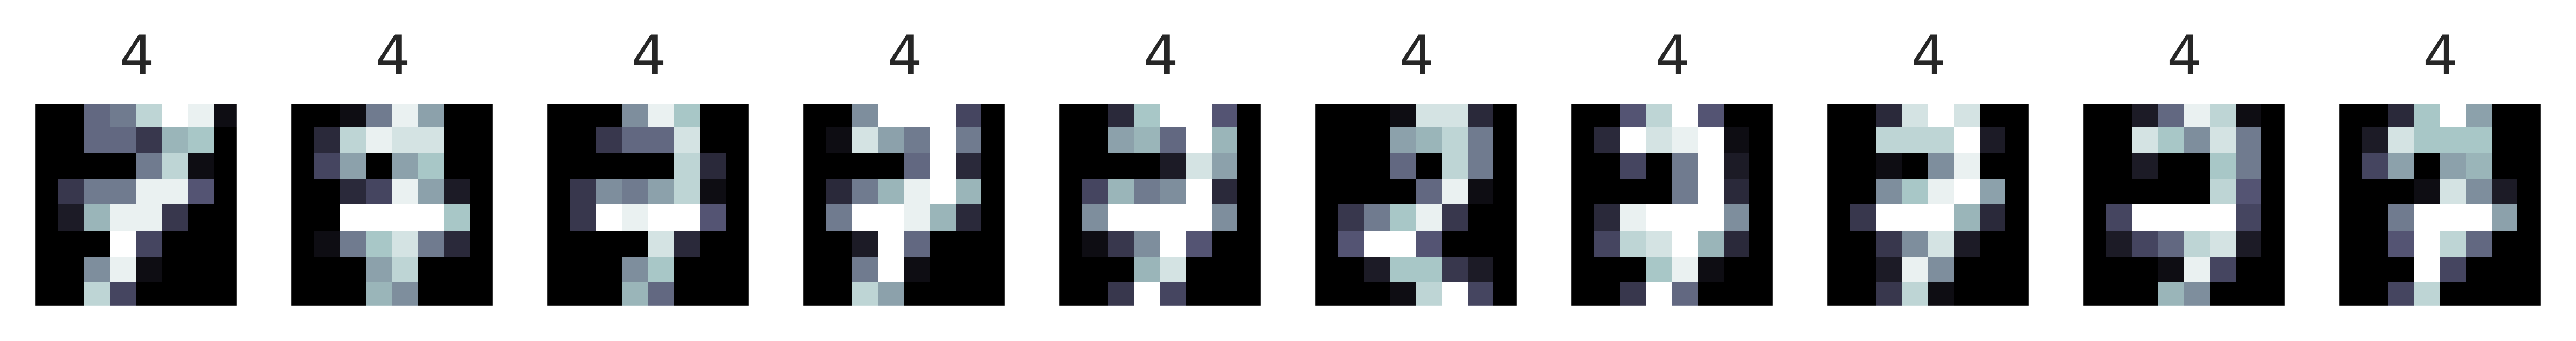

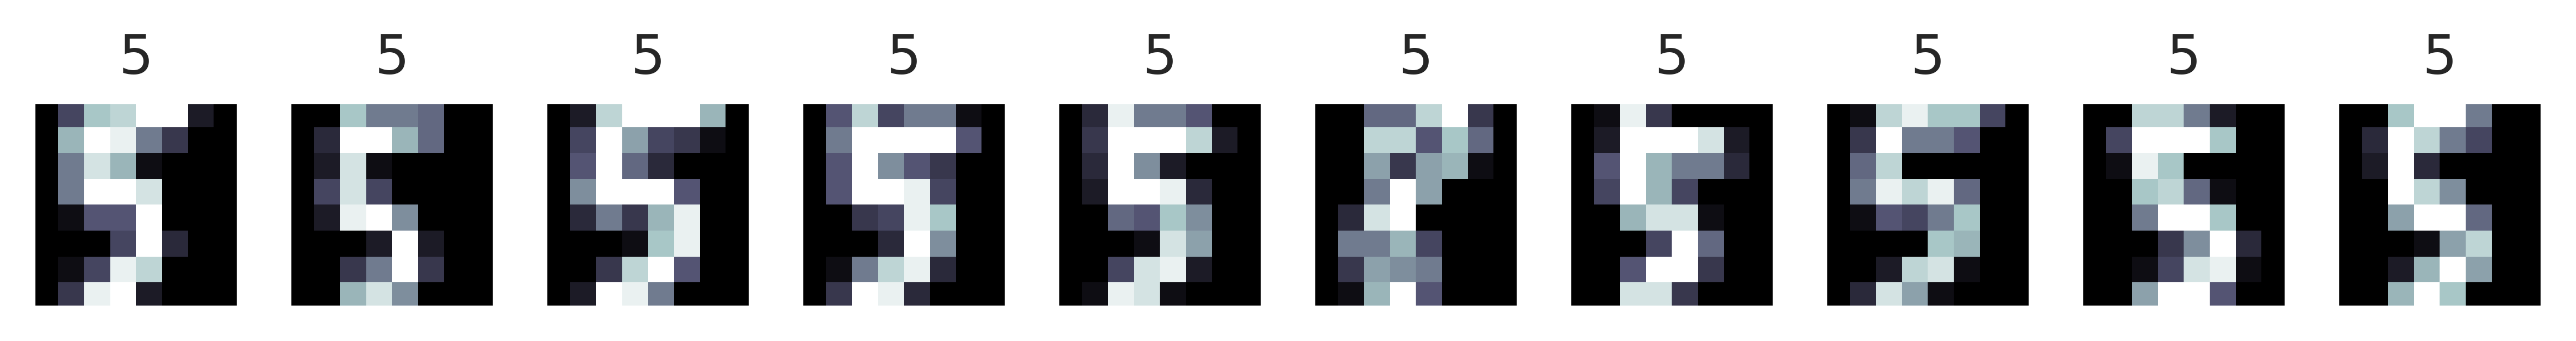

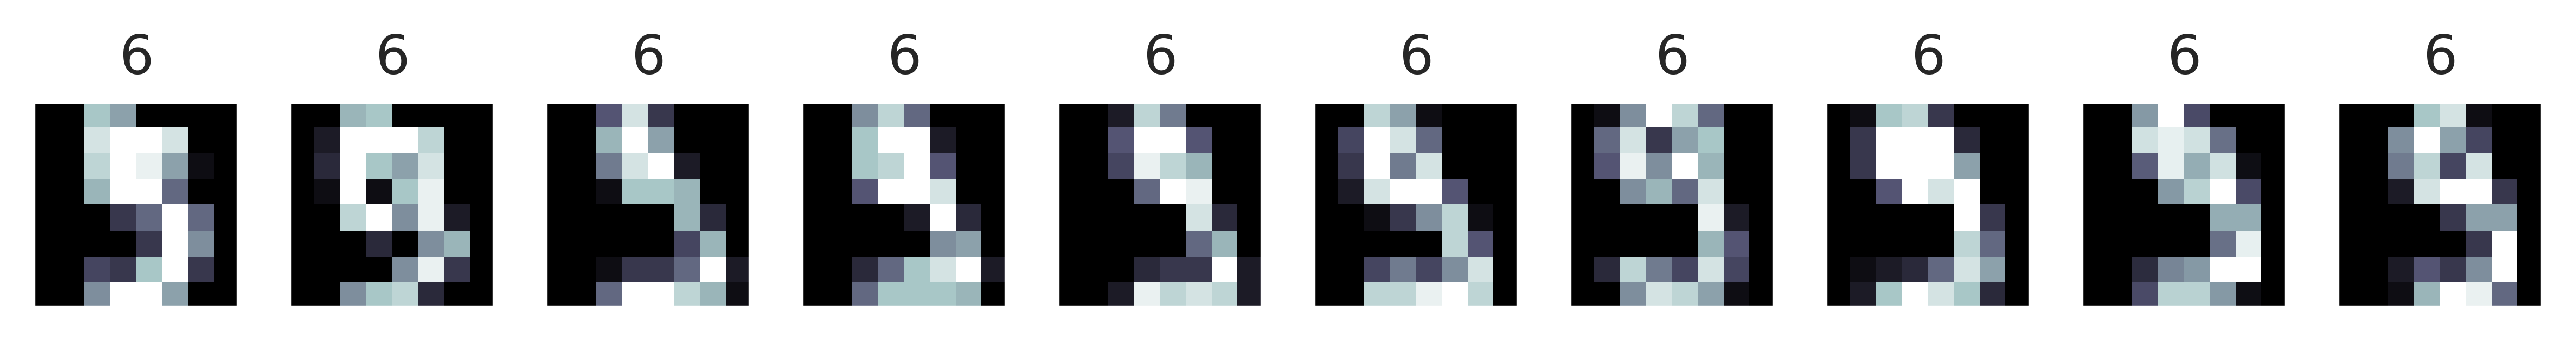

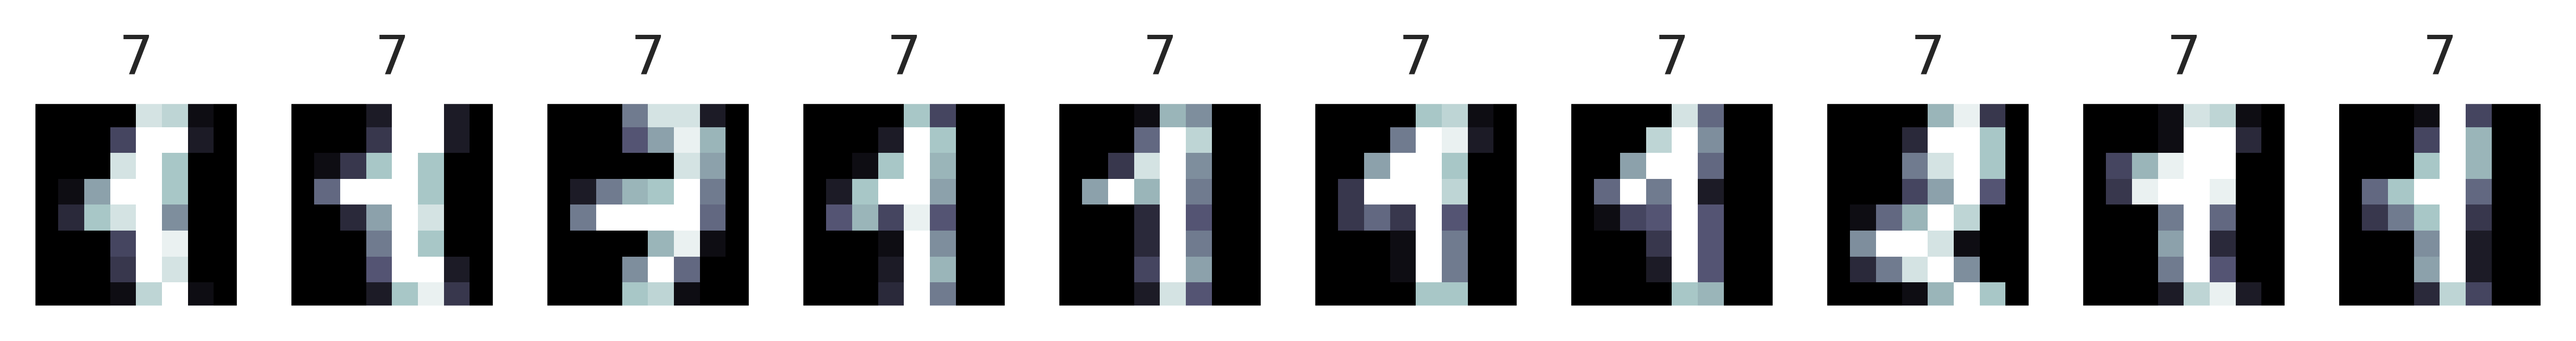

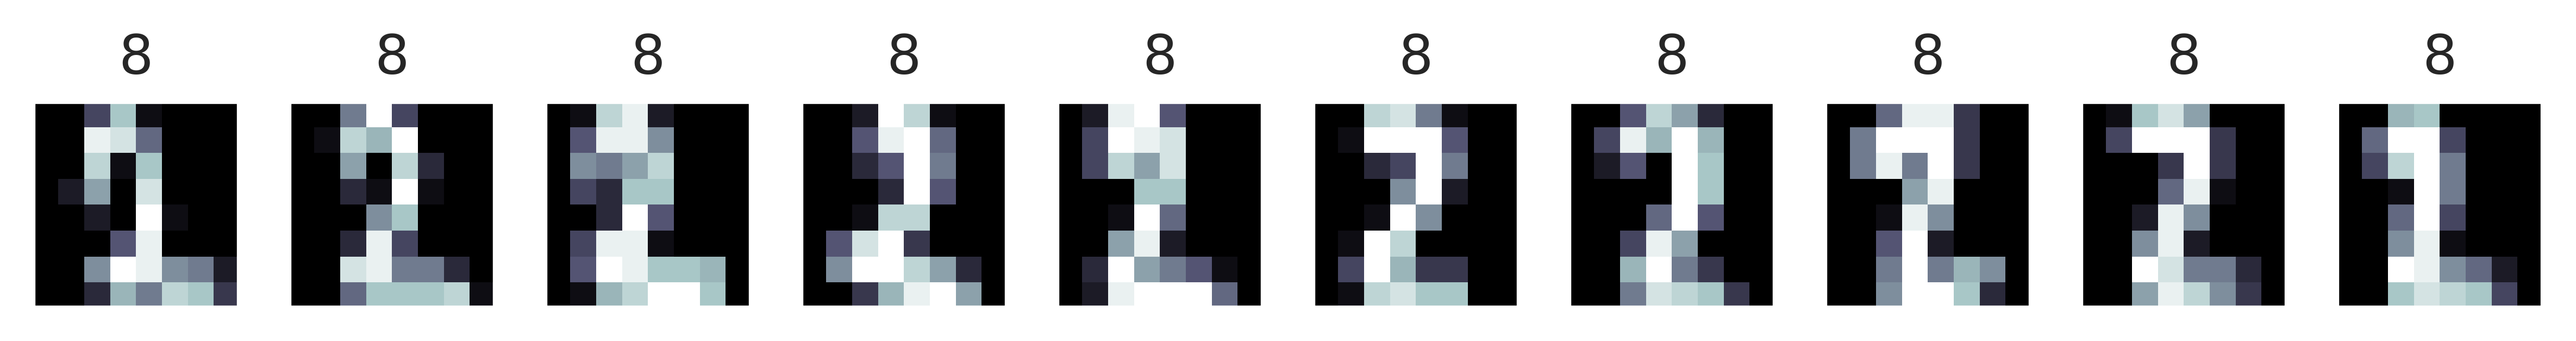

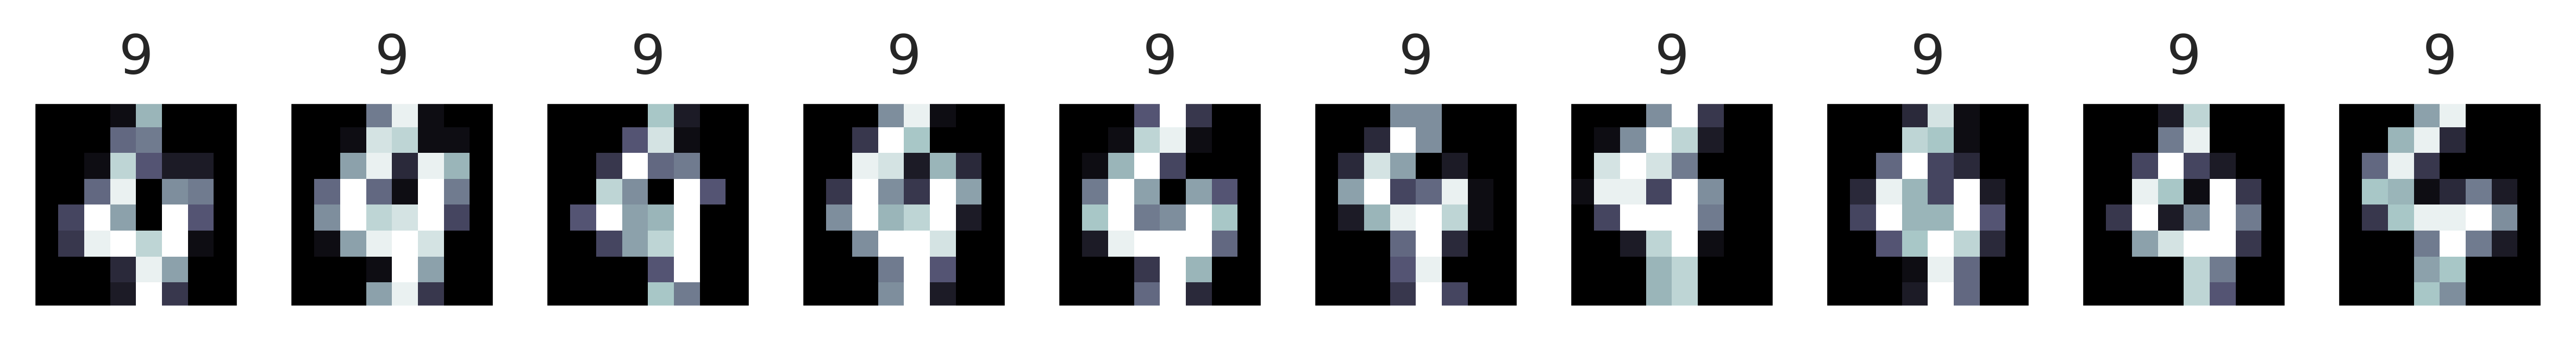

In [5]:
def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
        
def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)
    

for i in range(10):
    show_cluster(digits.images, y_pred, i)

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)
iris = load_iris()

idx = np.in1d(iris.target, [0,2])
X = iris.data[idx, :2]
y = (iris.target[idx]/2).astype(np.int)  #0,1로 만들기 위해


In [53]:
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits


digits = load_digits()

model = DBSCAN(eps=21.33, min_samples=7)
y_pred = model.fit_predict(digits.data)

from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score



print("ARI:", adjusted_rand_score(digits.target, y_pred))
print("AMI:", adjusted_mutual_info_score(digits.target, y_pred))


ARI: 0.5469631416788743
AMI: 0.7126258648997366


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [55]:
len(np.unique(y_pred))

20

In [51]:

for i in np.linspace(20, 24, num=13):
    for j in range(3,8):
        model = DBSCAN(eps=i, min_samples=5)
        y_pred = model.fit_predict(digits.data)

        print(i,j)
        print("ARI:", adjusted_rand_score(digits.target, y_pred))
        print("AMI:", adjusted_mutual_info_score(digits.target, y_pred))
        

20.0 3
ARI: 0.46642306208978074
AMI: 0.6742957472330771


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


20.0 4
ARI: 0.46642306208978074
AMI: 0.6742957472330771


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


20.0 5
ARI: 0.46642306208978074
AMI: 0.6742957472330771


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


20.0 6
ARI: 0.46642306208978074
AMI: 0.6742957472330771


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


20.0 7
ARI: 0.46642306208978074
AMI: 0.6742957472330771


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


20.333333333333332 3
ARI: 0.5139629384553532
AMI: 0.6852152612964058


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


20.333333333333332 4
ARI: 0.5139629384553532
AMI: 0.6852152612964058


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


20.333333333333332 5
ARI: 0.5139629384553532
AMI: 0.6852152612964058


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


20.333333333333332 6
ARI: 0.5139629384553532
AMI: 0.6852152612964058


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


20.333333333333332 7
ARI: 0.5139629384553532
AMI: 0.6852152612964058


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


20.666666666666668 3
ARI: 0.5490129258431671
AMI: 0.6952615358671279


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


20.666666666666668 4
ARI: 0.5490129258431671
AMI: 0.6952615358671279


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


20.666666666666668 5
ARI: 0.5490129258431671
AMI: 0.6952615358671279


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


20.666666666666668 6
ARI: 0.5490129258431671
AMI: 0.6952615358671279


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


20.666666666666668 7
ARI: 0.5490129258431671
AMI: 0.6952615358671279


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


21.0 3
ARI: 0.6139226006157167
AMI: 0.7251880499492438


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


21.0 4
ARI: 0.6139226006157167
AMI: 0.7251880499492438


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


21.0 5
ARI: 0.6139226006157167
AMI: 0.7251880499492438


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


21.0 6
ARI: 0.6139226006157167
AMI: 0.7251880499492438


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


21.0 7
ARI: 0.6139226006157167
AMI: 0.7251880499492438


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


21.333333333333332 3
ARI: 0.6169001185124113
AMI: 0.7498900665798556


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


21.333333333333332 4
ARI: 0.6169001185124113
AMI: 0.7498900665798556


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


21.333333333333332 5
ARI: 0.6169001185124113
AMI: 0.7498900665798556


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


21.333333333333332 6
ARI: 0.6169001185124113
AMI: 0.7498900665798556


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


21.333333333333332 7
ARI: 0.6169001185124113
AMI: 0.7498900665798556


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


21.666666666666668 3
ARI: 0.551912877682367
AMI: 0.7144565009215998


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


21.666666666666668 4
ARI: 0.551912877682367
AMI: 0.7144565009215998


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


21.666666666666668 5
ARI: 0.551912877682367
AMI: 0.7144565009215998


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


21.666666666666668 6
ARI: 0.551912877682367
AMI: 0.7144565009215998


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


21.666666666666668 7
ARI: 0.551912877682367
AMI: 0.7144565009215998


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


22.0 3
ARI: 0.5710840444622678
AMI: 0.7248693165670613


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


22.0 4
ARI: 0.5710840444622678
AMI: 0.7248693165670613


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


22.0 5
ARI: 0.5710840444622678
AMI: 0.7248693165670613


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


22.0 6
ARI: 0.5710840444622678
AMI: 0.7248693165670613


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


22.0 7
ARI: 0.5710840444622678
AMI: 0.7248693165670613


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


22.333333333333332 3
ARI: 0.4975731202951949
AMI: 0.6583054326349158


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


22.333333333333332 4
ARI: 0.4975731202951949
AMI: 0.6583054326349158


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


22.333333333333332 5
ARI: 0.4975731202951949
AMI: 0.6583054326349158


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


22.333333333333332 6
ARI: 0.4975731202951949
AMI: 0.6583054326349158


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


22.333333333333332 7
ARI: 0.4975731202951949
AMI: 0.6583054326349158


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


22.666666666666668 3
ARI: 0.27968564935372914
AMI: 0.5143687586135248


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


22.666666666666668 4
ARI: 0.27968564935372914
AMI: 0.5143687586135248


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


22.666666666666668 5
ARI: 0.27968564935372914
AMI: 0.5143687586135248


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


22.666666666666668 6
ARI: 0.27968564935372914
AMI: 0.5143687586135248


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


22.666666666666668 7
ARI: 0.27968564935372914
AMI: 0.5143687586135248


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


23.0 3
ARI: 0.28028502847263453
AMI: 0.5180661106094216


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


23.0 4
ARI: 0.28028502847263453
AMI: 0.5180661106094216


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


23.0 5
ARI: 0.28028502847263453
AMI: 0.5180661106094216


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


23.0 6
ARI: 0.28028502847263453
AMI: 0.5180661106094216


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


23.0 7
ARI: 0.28028502847263453
AMI: 0.5180661106094216


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


23.333333333333332 3
ARI: 0.2786520064112565
AMI: 0.5149962999114143


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


23.333333333333332 4
ARI: 0.2786520064112565
AMI: 0.5149962999114143


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


23.333333333333332 5
ARI: 0.2786520064112565
AMI: 0.5149962999114143


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


23.333333333333332 6
ARI: 0.2786520064112565
AMI: 0.5149962999114143


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


23.333333333333332 7
ARI: 0.2786520064112565
AMI: 0.5149962999114143


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


23.666666666666668 3
ARI: 0.27945455524045876
AMI: 0.5172642863586415


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


23.666666666666668 4
ARI: 0.27945455524045876
AMI: 0.5172642863586415


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


23.666666666666668 5
ARI: 0.27945455524045876
AMI: 0.5172642863586415


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


23.666666666666668 6
ARI: 0.27945455524045876
AMI: 0.5172642863586415


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


23.666666666666668 7
ARI: 0.27945455524045876
AMI: 0.5172642863586415


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


24.0 3
ARI: 0.18406756481648873
AMI: 0.40715165991499214


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


24.0 4
ARI: 0.18406756481648873
AMI: 0.40715165991499214


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


24.0 5
ARI: 0.18406756481648873
AMI: 0.40715165991499214


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


24.0 6
ARI: 0.18406756481648873
AMI: 0.40715165991499214


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


24.0 7
ARI: 0.18406756481648873
AMI: 0.40715165991499214


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
